In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_drug_data=pd.read_csv(mouse_drug_data_to_load)
clinical_trial_data=pd.read_csv(clinical_trial_data_to_load)
# Combine the data into a single dataset
data=pd.merge(clinical_trial_data,mouse_drug_data,how='left',on='Mouse ID')

# Display the data table for preview
data.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.0,0,Capomulin
1,f932,0,45.0,0,Ketapril
2,g107,0,45.0,0,Ketapril
3,a457,0,45.0,0,Ketapril
4,c819,0,45.0,0,Ketapril


## Tumor Response to Treatment

In [2]:
# Target Drug, and timepoint
drug=['Capomulin', 'Infubinol', 'Ketapril', 'Placebo']
timepoint=data['Timepoint'].unique()

# Create the dataset to plot
tv_time_drug=data.groupby(['Timepoint','Drug'])['Tumor Volume (mm3)'].mean().unstack()
tv_time_drug_sem=data.groupby(['Timepoint','Drug'])['Tumor Volume (mm3)'].sem().unstack()

# Preview dataset
tv_time_drug.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


In [3]:
# Preview dataset
tv_time_drug_sem.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.448593,0.164505,0.235102,0.264819,0.202385,0.218091,0.231708,0.482955,0.239862,0.188950
10,0.702684,0.236144,0.282346,0.357421,0.319415,0.402064,0.376195,0.720225,0.433678,0.263949
15,0.838617,0.332053,0.357705,0.580268,0.444378,0.614461,0.466109,0.770432,0.493261,0.370544
20,0.909731,0.359482,0.476210,0.726484,0.595260,0.839609,0.555181,0.786199,0.621889,0.533182


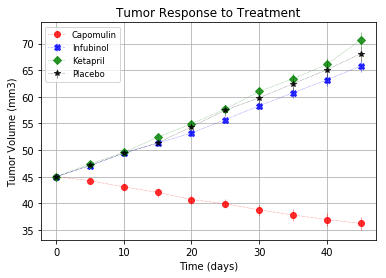

In [4]:
# Define the marker and colors to use
marker=['o','X','D','*']
colors=['r','b','g','k']

# Generate the Plot (with Error Bars)
fig, ax = plt.subplots()
for i in drug:
    ax.errorbar(timepoint,tv_time_drug[i], yerr=tv_time_drug_sem[i], fmt=marker[drug.index(i)],color=colors[drug.index(i)], 
                label=i,alpha=0.8, ls=':',linewidth=0.5) 

# Format the figure
ax.set_title("Tumor Response to Treatment")
ax.set_xlabel("Time (days)")
ax.set_ylabel("Tumor Volume (mm3)")
ax.grid(True)
plt.legend(loc="left", fontsize="small", fancybox=True)

# Save the Figure
plt.savefig("Tumor_Response_to_Treatment.png")

# Show the figure
plt.show()

In [5]:
'Conclusion: Capomulin shows the effect to decrease the size of tumor. Other two show no difference as placebo'

'Conclusion: Capomulin shows the effect to decrease the size of tumor. Other two show no difference as placebo'

## Metastatic Response to Treatment

In [6]:
# Create the dataset to plot
ms_time_drug=data.groupby(['Timepoint','Drug'])['Metastatic Sites'].mean().unstack()
ms_time_drug_sem=data.groupby(['Timepoint','Drug'])['Metastatic Sites'].sem().unstack()
# Preview dataset
ms_time_drug.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118


In [7]:
# Preview dataset
ms_time_drug_sem.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.074833,0.108588,0.091652,0.098100,0.093618,0.100947,0.095219,0.066332,0.087178,0.077709
10,0.125433,0.152177,0.159364,0.142018,0.163577,0.115261,0.105690,0.090289,0.123672,0.109109
15,0.132048,0.180625,0.194015,0.191381,0.158651,0.190221,0.136377,0.115261,0.153439,0.111677
20,0.161621,0.241034,0.234801,0.236680,0.181731,0.234064,0.171499,0.119430,0.200905,0.166378


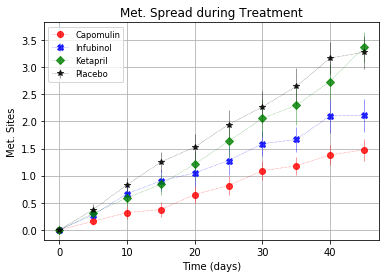

In [8]:
# Generate the Plot (with Error Bars)
fig, ax = plt.subplots()
for i in drug:
    ax.errorbar(timepoint,ms_time_drug[i], yerr=ms_time_drug_sem[i], fmt=marker[drug.index(i)],color=colors[drug.index(i)], 
                label=i,alpha=0.8, ls=':',linewidth=0.5) 

# Format the figure
ax.set_title("Met. Spread during Treatment")
ax.set_xlabel("Time (days)")
ax.set_ylabel("Met. Sites")
ax.grid(True)
plt.legend(loc="left", fontsize="small", fancybox=True)

# Save the Figure
plt.savefig("Met. Spread during Treatment.png")

# Show the figure
plt.show()

In [9]:
"Conclusion: Capomulin shows best Metastatic Response control; Infubinol shows some effect on Metastatic Response control; Ketapril shows no difference as placebo"

'Conclusion: Capomulin shows best Metastatic Response control; Infubinol shows some effect on Metastatic Response control; Ketapril shows no difference as placebo'

## Survival Rates

In [10]:
# Create the dataset to plot
s_time_drug=data.groupby(['Timepoint','Drug'])['Mouse ID'].count().unstack()/25*100

# Preview the dataset
s_time_drug.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,100.0,100.0,100.0,100.0,100.0,100.0,104.0,100.0,104.0,100.0
5,100.0,84.0,100.0,92.0,92.0,96.0,100.0,100.0,100.0,96.0
10,100.0,80.0,84.0,88.0,84.0,96.0,92.0,96.0,92.0,88.0
15,96.0,76.0,84.0,76.0,84.0,80.0,68.0,96.0,92.0,84.0
20,92.0,72.0,80.0,76.0,80.0,76.0,68.0,92.0,84.0,68.0


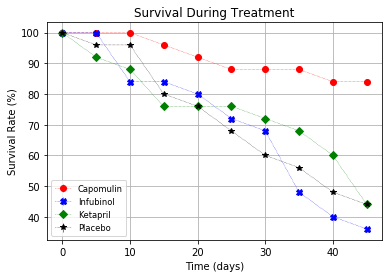

In [11]:
# Generate the Plot (with Error Bars)
fig, ax = plt.subplots()
for i in drug:
    ax.errorbar(timepoint,s_time_drug[i], yerr=ms_time_drug_sem[i], fmt=marker[drug.index(i)],color=colors[drug.index(i)], label=i,alpha=1, ls=':',linewidth=0.5) 

# Format the figure
ax.set_title("Survival During Treatment")
ax.set_xlabel("Time (days)")
ax.set_ylabel("Survival Rate (%)")
ax.grid(True)
plt.legend(loc="left", fontsize="small", fancybox=True)

# Save the Figure
plt.savefig("Survival During Treatment.png")

# Show the figure
plt.show()

In [12]:
'Conclusion: Capomulin shows promising survival rate. Other two provide no difference as placebo'

'Conclusion: Capomulin shows promising survival rate. Other two provide no difference as placebo'

## Summary Bar Graph

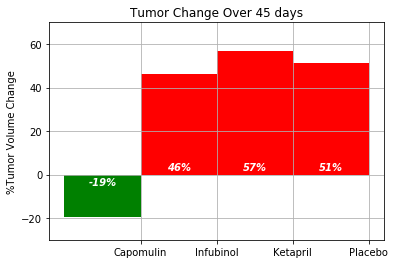

In [13]:
# Calculate the percent changes for each drug and save to a dataset
sumdata=()
for i in drug:
    sumdata=sumdata+((tv_time_drug[i][45]-tv_time_drug[i][0])/tv_time_drug['Capomulin'][0]*100,)

# Split the data with success (effective drugs) and fail (ineffective drugs). Store the different drug and corresponding ratio. 
suc_drug=[drug[i] for i in range(len(sumdata)) if sumdata[i]<0]
suc_ratio=[i for i in sumdata if i<0]
fail_drug=[drug[i] for i in range(len(sumdata)) if sumdata[i]>=0]
fail_ratio=[i for i in sumdata if i>0]

# Generate the bar plot
fig, ax = plt.subplots()
sucplot=ax.bar(suc_drug, suc_ratio,-1, color=["g"], align="edge")
failplot=ax.bar(fail_drug, fail_ratio,-1, color=["r"], align="edge")

# Format the figure
ax.grid(True)
ax.set_title("Tumor Change Over 45 days")
ax.set_ylabel("%Tumor Volume Change")
major_ticks = np.arange(-20, 80, 20)                                              
ax.set_yticks(major_ticks)
ax.set_ylim(-30,70)

# Label the bar
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        if height > 0:
            x='bottom'
            y=1
        else:
            x='top'
            y=-1

        ax.text(rect.get_x() + rect.get_width()/2., y,
                '{:.0f}%'.format(height),
                ha='center', va=x,color='w', fontweight='bold',fontstyle='italic')
autolabel(failplot)
autolabel(sucplot)

# Save the Figure
plt.savefig("Tumor Chage Over 45 days.png")

# Show the figure
plt.show()

In [14]:
'Conclusion: Over 45 days, Capomulin decrease the tumor volume by 19%. Other two show the similar tumor size increase as the placebo'

'Conclusion: Over 45 days, Capomulin decrease the tumor volume by 19%. Other two show the similar tumor size increase as the placebo'